In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imoore/60k-stack-overflow-questions-with-quality-rate")

print("Path to dataset files:", path)

100%|██████████| 21.0M/21.0M [00:02<00:00, 10.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/imoore/60k-stack-overflow-questions-with-quality-rate/versions/13


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train_path = "/content/train.csv"
valid_path = "/content/valid.csv"

In [15]:
train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)

In [ ]:
print("Training dataset shape:", train_df.shape)
print("First few rows of the training dataset:")
print(train_df.head())

print("\nValidation dataset shape:", valid_df.shape)
print("First few rows of the validation dataset:")
print(valid_df.head())
print("\nTraining dataset info:")
print(train_df.info())

print("\nValidation dataset info:")
print(valid_df.info())

Training dataset shape: (45000, 6)
First few rows of the training dataset:
         Id                                              Title  \
0  34552656             Java: Repeat Task Every Random Seconds   
1  34553034                  Why are Java Optionals immutable?   
2  34553174  Text Overlay Image with Darkened Opacity React...   
3  34553318         Why ternary operator in swift is so picky?   
4  34553755                 hide/show fab with scale animation   

                                                Body  \
0  <p>I'm already familiar with repeating tasks e...   
1  <p>I'd like to understand why Java 8 Optionals...   
2  <p>I am attempting to overlay a title over an ...   
3  <p>The question is very simple, but I just cou...   
4  <p>I'm using custom floatingactionmenu. I need...   

                                                Tags         CreationDate  \
0                                     <java><repeat>  2016-01-01 00:21:59   
1                                   <

# import data

Head of /content/valid.csv after dropping columns and mapping labels:
                                               Title  \
0  How to get all the child records from differen...   
1  Retrieve all except some data of the another t...   
2                                  Pandas: read_html   
3                           Reader Always gimme NULL   
4    php rearrange array elements based on condition   

                                                Body  Y  
0  I am having 4 different tables like \r\nselect...  1  
1  I have two table m_master and tbl_appointment\...  1  
2  <p>I'm trying to extract US states from wiki U...  2  
3  I'm so new to C#, I wanna make an application ...  1  
4  basically i have this array:\r\n\r\n    array(...  1  


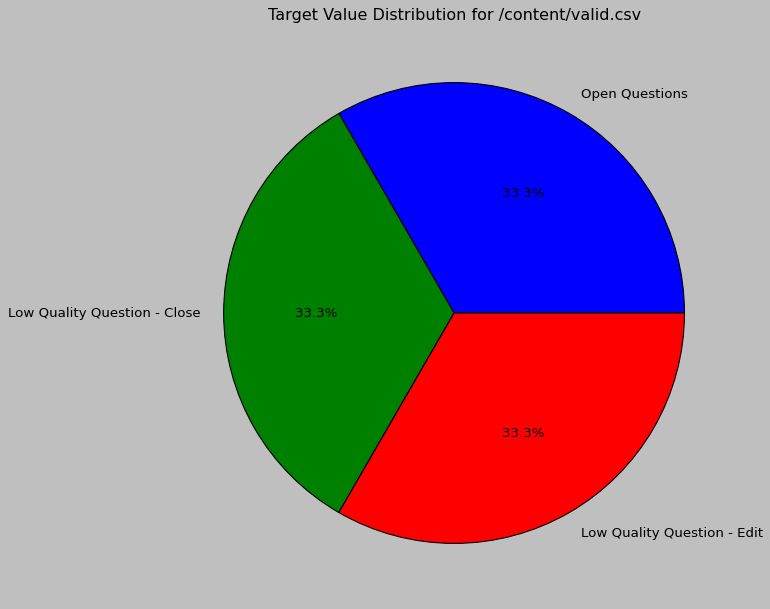

Head of /content/valid.csv after creating the combined 'text' column:
   Y                                               text
0  1  How to get all the child records from differen...
1  1  Retrieve all except some data of the another t...
2  2  Pandas: read_html <p>I'm trying to extract US ...
3  1  Reader Always gimme NULL I'm so new to C#, I w...
4  1  php rearrange array elements based on conditio...
Head of /content/valid.csv after cleaning the 'text' column:
   Y                                               text
0  1  how to get all the child records from differen...
1  1  retrieve all except some data of the another t...
2  2  pandas readhtml pim trying to extract us state...
3  1  reader always gimme null im so new to c i wann...
4  1  php rearrange array elements based on conditio...
Head of /content/train.csv after dropping columns and mapping labels:
                                               Title  \
0             Java: Repeat Task Every Random Seconds   
1              

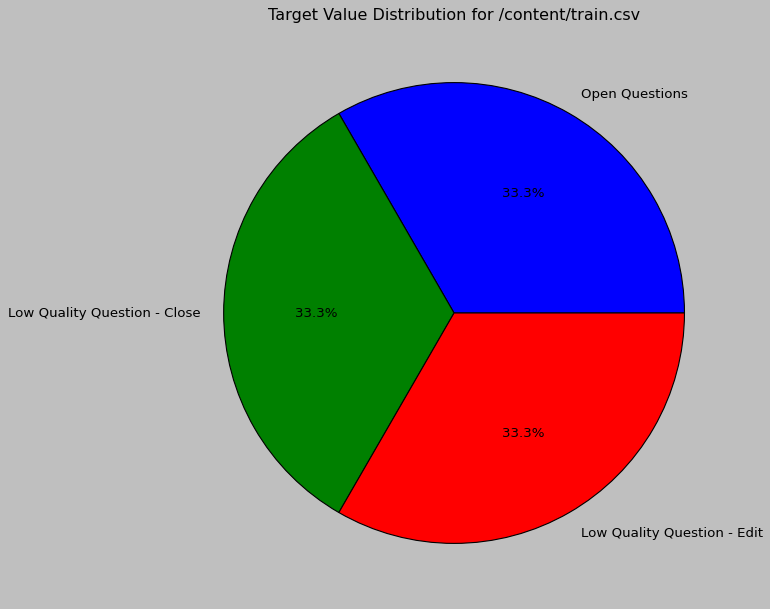

Head of /content/train.csv after creating the combined 'text' column:
   Y                                               text
0  0  Java: Repeat Task Every Random Seconds <p>I'm ...
1  2  Why are Java Optionals immutable? <p>I'd like ...
2  2  Text Overlay Image with Darkened Opacity React...
3  2  Why ternary operator in swift is so picky? <p>...
4  2  hide/show fab with scale animation <p>I'm usin...
Head of /content/train.csv after cleaning the 'text' column:
   Y                                               text
0  0  java repeat task every random seconds pim alre...
1  2  why are java optionals immutable pid like to u...
2  2  text overlay image with darkened opacity react...
3  2  why ternary operator in swift is so picky pthe...
4  2  hideshow fab with scale animation pim using cu...


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def process_dataset(file_path):
    """
    Process the dataset by performing the following steps:
    1. Load the CSV file.
    2. Drop the columns: 'Id', 'Tags', 'CreationDate'.
    3. Map the quality labels in column 'Y' to numeric values:
         'LQ_CLOSE' -> 0
         'LQ_EDIT'  -> 1
         'HQ'       -> 2
    4. Plot a pie chart showing the distribution of the target values.
    5. Create a new 'text' column by concatenating 'Title' and 'Body'.
    6. Drop the original 'Title' and 'Body' columns.
    7. Clean the 'text' column by converting to lowercase and removing non-alphabetic characters.
    """
    # Load dataset from CSV file
    data = pd.read_csv(file_path)

    # Drop unnecessary columns
    data = data.drop(['Id', 'Tags', 'CreationDate'], axis=1)

    # Map quality labels to numeric values:
    # 'LQ_CLOSE' -> 0, 'LQ_EDIT' -> 1, 'HQ' -> 2
    data['Y'] = data['Y'].map({'LQ_CLOSE': 0, 'LQ_EDIT': 1, 'HQ': 2})

    print(f"Head of {file_path} after dropping columns and mapping labels:")
    print(data.head())

    # Define labels for the pie chart
    labels = ['Open Questions', 'Low Quality Question - Close', 'Low Quality Question - Edit']

    # Calculate target value counts:
    # Open Questions (HQ) are mapped to 2; LQ_CLOSE to 0; LQ_EDIT to 1.
    values = [
        len(data[data['Y'] == 2]),
        len(data[data['Y'] == 0]),
        len(data[data['Y'] == 1])
    ]

    # Plot the pie chart for target value distribution
    plt.style.use('classic')
    plt.figure(figsize=(16, 9))
    plt.pie(x=values, labels=labels, autopct="%1.1f%%")
    plt.title(f"Target Value Distribution for {file_path}")
    plt.show()

    # Create a combined 'text' column from 'Title' and 'Body'
    data['text'] = data['Title'] + ' ' + data['Body']

    # Drop the original 'Title' and 'Body' columns
    data = data.drop(['Title', 'Body'], axis=1)

    print(f"Head of {file_path} after creating the combined 'text' column:")
    print(data.head())

    # Define a function to clean the text data
    def clean_text(text):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^(a-zA-Z)\s]', '', text)  # Remove non-letter characters (excluding whitespace)
        return text

    # Apply the cleaning function to the 'text' column
    data['text'] = data['text'].apply(clean_text)

    print(f"Head of {file_path} after cleaning the 'text' column:")
    print(data.head())

    return data

# Process the valid dataset
valid_data = process_dataset("/content/valid.csv")

# Process the test dataset
train_data = process_dataset("/content/train.csv")

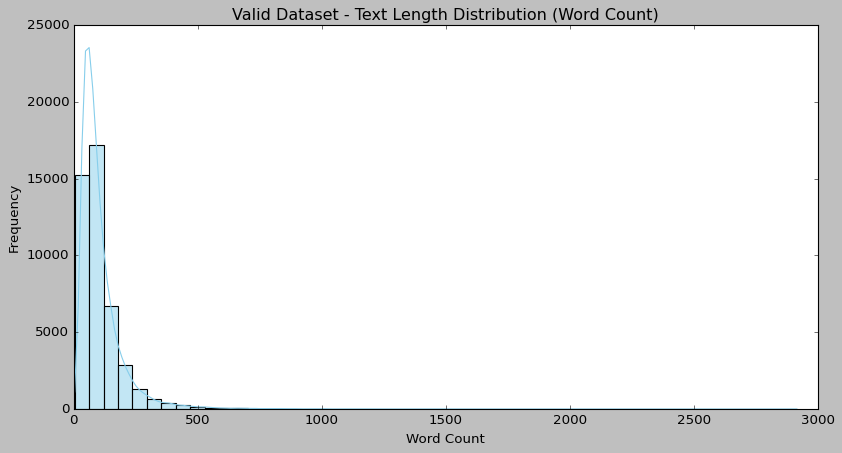

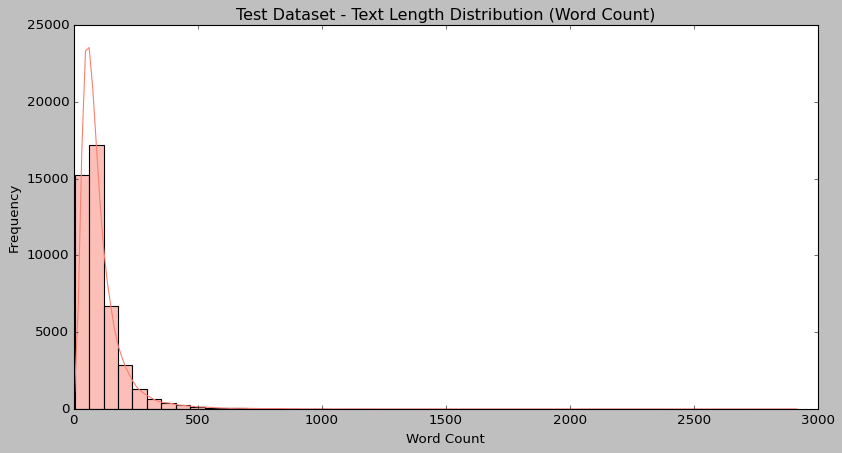

<ipython-input-6-9a783ca05fde>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_str', data=valid_data, palette='viridis')


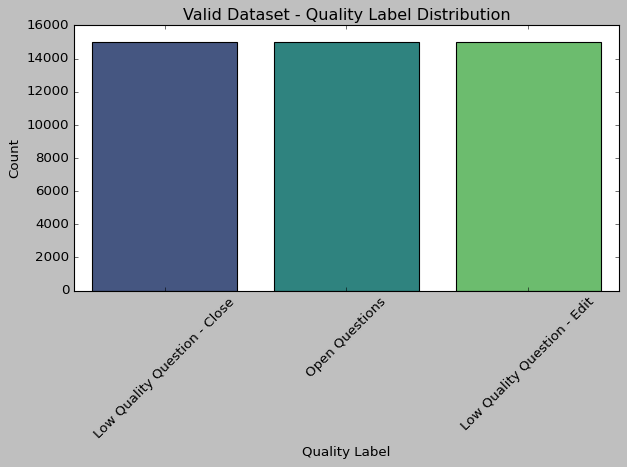

<ipython-input-6-9a783ca05fde>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_str', data=test_data, palette='viridis')


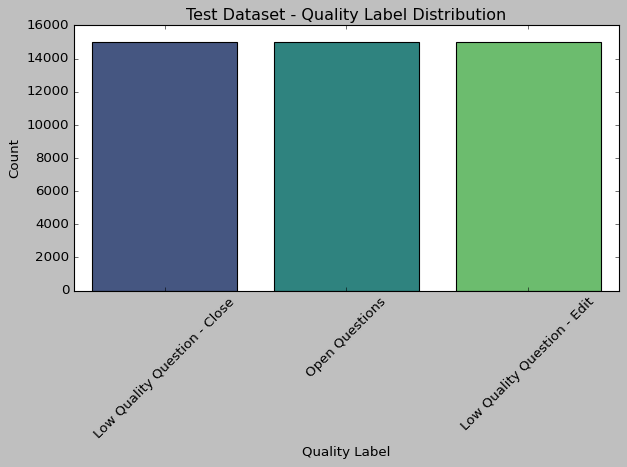

<ipython-input-6-9a783ca05fde>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label_str', y='text_length', data=avg_text_len, palette='coolwarm')


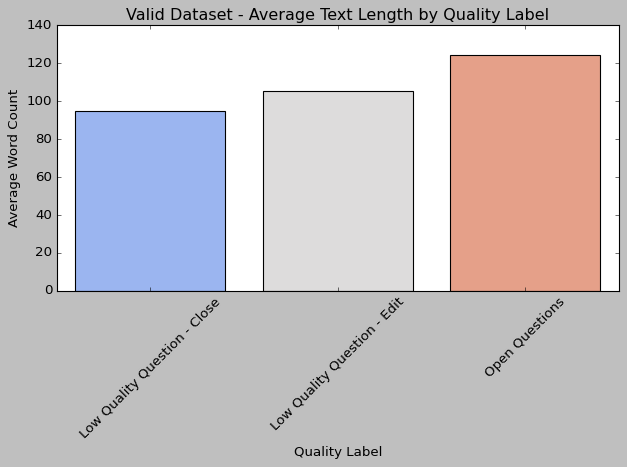

<ipython-input-6-9a783ca05fde>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_str', y='text_length', data=valid_data, palette='Set3')


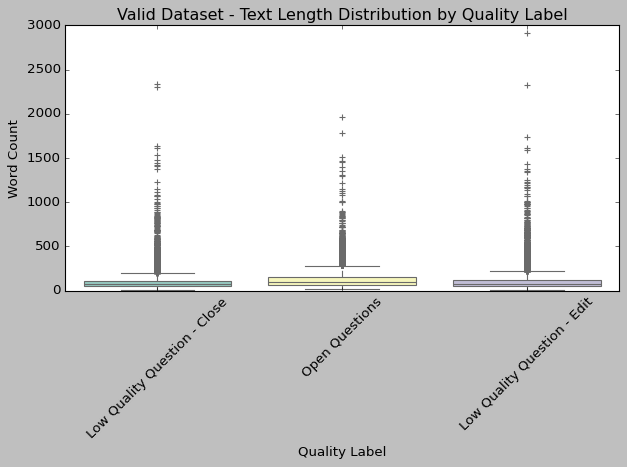

In [6]:
# 1. Create a text length feature (word count) for both datasets.
valid_data['text_length'] = valid_data['text'].apply(lambda x: len(x.split()))
test_data['text_length'] = test_data['text'].apply(lambda x: len(x.split()))

# 2. For visualization purposes, create human-readable labels.
# Mapping (already applied during processing):
#   0 -> 'Low Quality Question - Close'
#   1 -> 'Low Quality Question - Edit'
#   2 -> 'Open Questions'
label_mapping_inv = {
    0: 'Low Quality Question - Close',
    1: 'Low Quality Question - Edit',
    2: 'Open Questions'
}

valid_data['label_str'] = valid_data['Y'].map(label_mapping_inv)
train_data['label_str'] = test_data['Y'].map(label_mapping_inv)

# -------------------------------
# Visualization 1: Text Length Distribution (Word Count)
# -------------------------------

# Valid dataset text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(valid_data['text_length'], bins=50, kde=True, color='skyblue')
plt.title("Valid Dataset - Text Length Distribution (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Test dataset text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_data['text_length'], bins=50, kde=True, color='salmon')
plt.title("Trian Dataset - Text Length Distribution (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# Visualization 2: Quality Label Distribution (Count Plot)
# -------------------------------

# For valid dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label_str', data=valid_data, palette='viridis')
plt.title("Valid Dataset - Quality Label Distribution")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For test dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label_str', data=train_data, palette='viridis')
plt.title("train Dataset - Quality Label Distribution")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 3: Average Text Length by Quality Label (Bar Plot)
# -------------------------------

# Calculate average word count for each quality label in the valid dataset
avg_text_len = valid_data.groupby('label_str')['text_length'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='label_str', y='text_length', data=avg_text_len, palette='coolwarm')
plt.title("Valid Dataset - Average Text Length by Quality Label")
plt.xlabel("Quality Label")
plt.ylabel("Average Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 4: Text Length Distribution by Quality Label (Box Plot)
# -------------------------------

plt.figure(figsize=(8, 6))
sns.boxplot(x='label_str', y='text_length', data=valid_data, palette='Set3')
plt.title("Valid Dataset - Text Length Distribution by Quality Label")
plt.xlabel("Quality Label")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-463a2e9a69c2>:3: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(x='label_str', y='text_length', data=valid_data, scale='exponential')


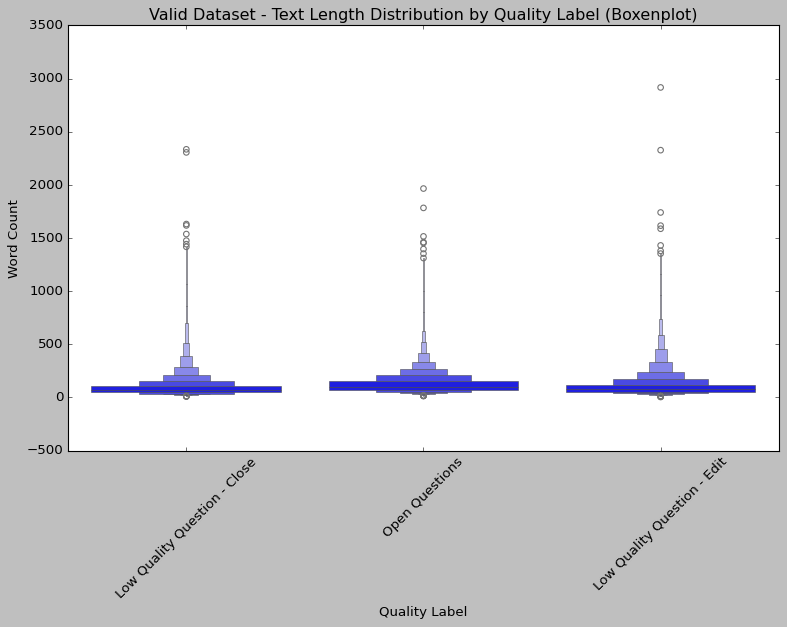

In [12]:
# visual 4
plt.figure(figsize=(10, 8))
sns.boxenplot(x='label_str', y='text_length', data=valid_data, scale='exponential')
plt.title("Valid Dataset - Text Length Distribution by Quality Label (Boxenplot)")
plt.xlabel("Quality Label")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# baseline

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Baseline Model Evaluation Metrics:
Accuracy: 87.77%
Precision: 87.62%
Recall: 87.77%
F1 Score: 87.64%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5000
           1       0.92      0.98      0.95      5000
           2       0.86      0.85      0.85      5000

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



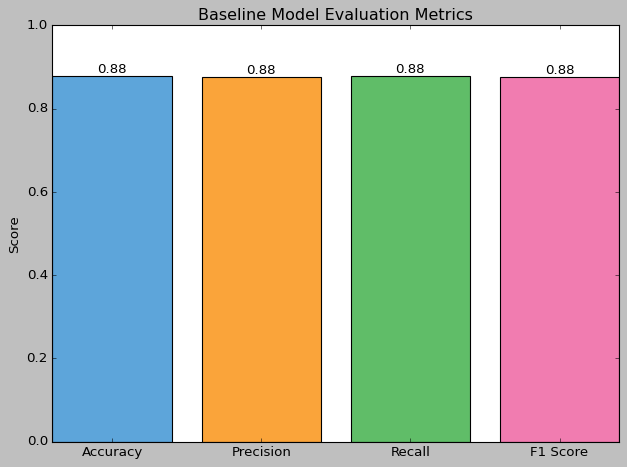

In [22]:
# Step 1: Feature Extraction using TF-IDF
# ------------------------------------------------------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform text into feature vectors
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
y_train = train_data['Y']

# Transform the validation data into the same TF-IDF feature space
X_valid = tfidf_vectorizer.transform(valid_data['text'])
y_valid = valid_data['Y']

# ------------------------------------------------------------------------
# Step 2: Build and Train the Baseline Model (Logistic Regression)
# ------------------------------------------------------------------------
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# ------------------------------------------------------------------------
# Step 3: Evaluate the Model
# ------------------------------------------------------------------------
# Predict labels for the validation set
y_pred = baseline_model.predict(X_valid)

# Calculate evaluation metrics
accuracy  = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall    = recall_score(y_valid, y_pred, average='weighted')
f1        = f1_score(y_valid, y_pred, average='weighted')

# Print the evaluation metrics
print("Baseline Model Evaluation Metrics:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("\nDetailed Classification Report:")
print(classification_report(y_valid, y_pred))

# ------------------------------------------------------------------------
# Step 4: Visualize Evaluation Metrics in a Bar Chart
# ------------------------------------------------------------------------
# Prepare metric names and their corresponding values (in decimal score)
metrics_names  = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics_names, metrics_values,
               color=['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0'], edgecolor='black')
plt.title("Baseline Model Evaluation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#BERT

In [23]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ------------------------------------------------------------------------
# This script demonstrates a simple BERT model fine-tuning workflow for text classification.
#
# Model Architecture Details:
# - Base Model: bert-base-uncased (from HuggingFace Transformers)
#   - 12 Transformer encoder layers (Transformer blocks)
#   - Hidden size: 768
#   - 12 self-attention heads
#   - Total parameters: ~110M
#
# - Classification Head:
#   - Applies a dropout layer before a linear layer.
#   - The linear layer maps the [CLS] token representation to the number of classes.
#
# Training Parameters:
# - Tokenizer: BertTokenizer ('bert-base-uncased') for case normalization and subword tokenization.
# - Maximum sequence length: 128 tokens (configurable)
# - Batch size: 16 per device (configurable via TrainingArguments)
# - Number of epochs: 3 (for demonstration; adjust as needed)
#
# Evaluation Metrics:
# - Accuracy, Precision, Recall, and F1 Score (weighted average for multi-class tasks)
#
# Visualization:
# - A bar chart displays the evaluation metrics.
#
# This script uses HuggingFace's Trainer API for training and evaluation.

In [24]:
class TextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        """
        Args:
            data (pd.DataFrame): Contains 'text' and 'Y' columns.
            tokenizer (BertTokenizer): Pretrained BERT tokenizer to encode the text.
            max_length (int): Maximum token length for each sequence.
        """
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Retrieve text and label for the given index.
        text = str(self.data.iloc[idx]['text'])
        label = int(self.data.iloc[idx]['Y'])

        # Tokenize the input text:
        # - add_special_tokens: Adds [CLS] and [SEP] tokens.
        # - max_length: Pads or truncates to a fixed length.
        # - padding: Pads sequences to max_length.
        # - truncation: Truncates sequences longer than max_length.
        # - return_attention_mask: Returns an attention mask.
        # - return_tensors: Returns PyTorch tensors.
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # Squeeze tensor dimensions to remove the extra batch dimension.
        item = {key: val.squeeze() for key, val in encoding.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item

# Initialize the BERT tokenizer from the pretrained "bert-base-uncased" model.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Create dataset instances for training and validation.
train_dataset = TextDataset(train_data, tokenizer, max_length=128)
valid_dataset = TextDataset(valid_data, tokenizer, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [26]:
# Step 3: Initialize the BERT Model for Sequence Classification
# ------------------------------------------------------------------------
# The model is based on a pretrained BERT ('bert-base-uncased') and includes:
# - A pooling layer that extracts the representation of the [CLS] token.
# - A dropout layer for regularization.
# - A linear classifier mapping the pooled output to the desired number of classes.
num_labels = train_data['Y'].nunique()
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels,       # Set according to the number of classes.
    output_attentions=False,     # Do not return attention weights.
    output_hidden_states=False   # Do not return hidden states.
)

# ------------------------------------------------------------------------
# Step 4: Check for GPU and Move the Model if Available
# ------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model.to(device)  # Move model parameters to the GPU if available

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [27]:
# ------------------------------------------------------------------------
# Step 5: Define Training Arguments and Evaluation Metrics
# ------------------------------------------------------------------------
def compute_metrics(pred):
    """
    Compute evaluation metrics: accuracy, precision, recall, and F1 score.
    This function will be used by the Trainer during evaluation.
    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Define training hyperparameters using Trainer's TrainingArguments.
training_args = TrainingArguments(
    output_dir='./bert_output',      # Directory to save model checkpoints.
    num_train_epochs=3,              # Total number of training epochs.
    per_device_train_batch_size=16,  # Batch size per device during training.
    per_device_eval_batch_size=16,   # Batch size for evaluation.
    warmup_steps=500,                # Number of steps to perform a linear learning rate warmup.
    weight_decay=0.01,               # Strength of weight decay for regularization.
    logging_dir='./logs',            # Directory for storing logs.
    logging_steps=100,               # Log training info every 100 steps.
    evaluation_strategy="epoch",     # Evaluate the model at the end of each epoch.
    save_strategy="epoch",           # Save checkpoints at the end of each epoch.
    load_best_model_at_end=True,     # Automatically load the best model when training finishes.
    no_cuda=False                    # Ensure CUDA is used if available.
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
# ------------------------------------------------------------------------
# Step 6: Create the Trainer and Fine-Tune the BERT Model
# ------------------------------------------------------------------------
trainer = Trainer(
    model=model,                         # The BERT model for sequence classification.
    args=training_args,                  # Training arguments.
    train_dataset=train_dataset,         # Training dataset.
    eval_dataset=valid_dataset,          # Evaluation dataset.
    compute_metrics=compute_metrics      # Function to compute evaluation metrics.
)

# Fine-tune the model.
trainer.train()

# Evaluate the model on the validation set.
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:")
print(eval_results)


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 94000471 (94000471-nanyang-technological-university-singapore) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.211000,0.210452,0.925933,0.926414,0.925933,0.925939
2,0.148700,0.263359,0.918600,0.923051,0.918600,0.918236
3,0.093100,0.275907,0.930533,0.930686,0.930533,0.930549


BERT Model Evaluation Results:
{'eval_loss': 0.2104519158601761, 'eval_accuracy': 0.9259333333333334, 'eval_precision': 0.9264139821225886, 'eval_recall': 0.9259333333333334, 'eval_f1': 0.925939458893337, 'eval_runtime': 147.81, 'eval_samples_per_second': 101.482, 'eval_steps_per_second': 6.346, 'epoch': 3.0}


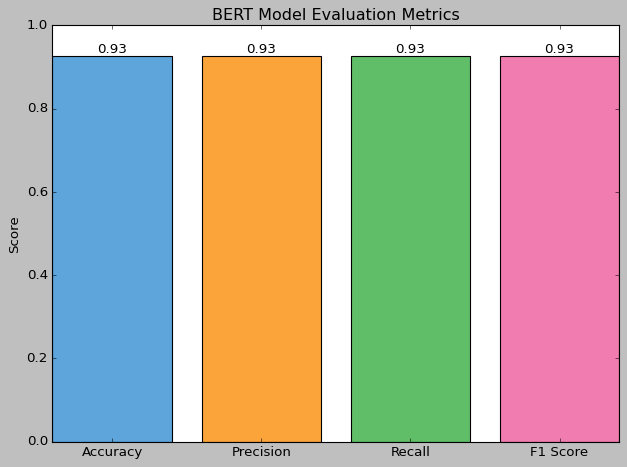

In [31]:
# Step 7: Visualize Evaluation Metrics in a Bar Chart
# ------------------------------------------------------------------------
# Extract evaluation metrics. Trainer prefixes metrics with "eval_" when logging.
# We try to retrieve both versions (with and without "eval_") for compatibility.
accuracy_value = eval_results.get("eval_accuracy", eval_results.get("accuracy"))
precision_value = eval_results.get("eval_precision", eval_results.get("precision"))
recall_value = eval_results.get("eval_recall", eval_results.get("recall"))
f1_value = eval_results.get("eval_f1", eval_results.get("f1"))

# Prepare metric names and their corresponding values.
metrics_names  = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy_value, precision_value, recall_value, f1_value]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics_names, metrics_values,
               color=['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0'], edgecolor='black')
plt.title("BERT Model Evaluation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")

# Add numerical values on top of each bar.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# ROBERTA-BASED MODEL

Enhancing Website Comment Classification with a Multi-Layered Output Head

Website comment classification poses unique challenges due to the noisy and varied nature of user-generated content. Traditional approaches, such as using a single-layer output head—as implemented in many pre-trained transformer models like BERT or even the default head in RoBERTa—often fall short when handling subtle nuances or mitigating the effects of noisy data. In our research case, we propose an optimized multi-layer classification head tailored specifically to improve the performance and robustness of comment classification tasks.

The Approach: Multi-Layer Classification Head

In contrast to the standard single fully-connected layer that maps the [CLS] token’s embedding directly to the output classes, our method introduces an additional hidden layer with non-linear activation and enhanced regularization. The structure of our custom classification head is as follows:

Intermediate Fully-Connected Layer:

The embedding output of the [CLS] token is first projected into a lower-dimensional space. By reducing the dimensionality, we force the network to extract the most salient aspects of the comment representation.
Non-linear Activation Function (ReLU):
A ReLU activation is applied to inject non-linearity into the model. This step enables the network to learn complex patterns that a single-layer linear transformation might overlook, especially in the presence of noisy and diverse input content.

Dropout Regularization:

After the activation, dropout is employed to combat overfitting. This is particularly important for website comments where the variance in language style and content can introduce significant noise. The dropout layer randomly deactivates a fraction of the neurons during training, which encourages the model to learn more robust features.

Final Fully-Connected Output Layer:

The refined features are then passed through a final linear layer to produce the class logits for prediction.

Benefits of the Multi-Layer Design

Enhanced Feature Extraction:

The additional hidden layer allows the model to learn a richer representation of the comment data. By capturing non-linear interactions among features, the model is better able to discern subtle cues in user comments that are indicative of sentiment, spam, or other classifications.

Improved Robustness to Noise:

Website comments are inherently unpredictable and often contain slang, misspellings, and mixed content. The dropout regularization introduced in the multi-layer design provides a mechanism to prevent overfitting to noisy training data and thus enhances generalization on unseen comments.

Better Handling Imbalanced Datasets:

When dealing with imbalanced class distributions—a common scenario in user-generated content tasks—the non-linear transformation can provide a more discriminative mapping for the minority classes. This improved separation in the feature space facilitates better learning even with fewer samples.

Maintained Efficiency:

Despite the additional layer, the overall computational overhead remains manageable. The design is careful to preserve training efficiency, ensuring that the improvements do not significantly extend the training time. This aspect is critical when deploying on resource-constrained hardware such as T4 GPUs.

In [3]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [4]:
import torch
import torch.nn as nn
from transformers import RobertaForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback

In [5]:
# ------------------------------------------------------------------------------
# THIS CODE IMPLEMENTS A ROBERTA-BASED MODEL WITH THE FOLLOWING IMPROVEMENTS:
#
# 1. AUTOMATED HYPERPARAMETER TUNING:
#    - Utilizes Optuna (via Hugging Face's Trainer.hyperparameter_search) to tune
#      key hyperparameters such as learning rate, number of training epochs, and
#      per-device batch size.
#
# 2. CUSTOM OUTPUT LAYER OPTIMIZATION FOR WEBSITE COMMENT CLASSIFICATION:
#    - Introduces a custom multi-layer classification head for RoBERTa.
#      Compared to the default single-layer classifier (or BERT's design), we add:
#        * A hidden fully-connected layer to first project the [CLS] embedding to a
#          lower-dimensional space.
#        * An activation function (ReLU) and an additional dropout layer.
#      This design aims to better handle the noisy and diverse nature of website comments.
#
# 3. TRAINING EFFICIENCY:
#    - Mixed precision training (fp16) enabled to reduce memory usage and speed up training,
#      which is particularly beneficial on a T4 GPU.
#
# Note: The data files "train.csv" and "valid.csv" are expected to contain at least two columns:
#       "text" (input text) and "Y" (class label).
# ------------------------------------------------------------------------------
num_labels = train_data['Y'].nunique()

In [6]:
# ------------------------------------------------------------------------------
# Step 2: Define a Custom Dataset for Tokenization
# ------------------------------------------------------------------------------
class TextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        """
        Args:
            data (pd.DataFrame): DataFrame containing "text" and "Y" columns.
            tokenizer (RobertaTokenizer): Pretrained RoBERTa tokenizer.
            max_length (int): Maximum sequence length.
        """
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = str(self.data.iloc[idx]['text'])
        label = int(self.data.iloc[idx]['Y'])

        # For RoBERTa, no token_type_ids are used.
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # Squeeze out the batch dimension.
        item = {key: val.squeeze() for key, val in encoding.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item


In [7]:
# ------------------------------------------------------------------------------
# Step 3: Initialize Tokenizer and Create Dataset Instances
# ------------------------------------------------------------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
train_dataset = TextDataset(train_data, tokenizer, max_length=128)
valid_dataset = TextDataset(valid_data, tokenizer, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [8]:
# ------------------------------------------------------------------------------
# Step 4: Define Custom Model with an Optimized Classification Head
# ------------------------------------------------------------------------------
# For website comment classification, we design a multi-layer classification head.
# Compared to the default RoBERTaForSequenceClassification which uses a single or two-layer
# classifier, the custom head here explicitly adds a hidden layer with ReLU activation and
# an additional dropout layer to better handle noisy inputs.
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import RobertaForSequenceClassification

class CustomRobertaForSequenceClassification(RobertaForSequenceClassification):
    def __init__(self, config):
        super().__init__(config)
        hidden_size = config.hidden_size  # 例如：768
        mid_dim = hidden_size // 2

        # 直接将自定义分类头赋值给 self.classifier，而不使用重复的引用名称。
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, mid_dim),
            nn.ReLU(),
            nn.Dropout(config.hidden_dropout_prob),
            nn.Linear(mid_dim, config.num_labels)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        # 因为 outputs 只有一个元素（last_hidden_state），所以取 [batch_size, seq_len, hidden_size] 的第一个 token 作为 pooled_output
        last_hidden_state = outputs[0]
        pooled_output = last_hidden_state[:, 0, :]
        logits = self.classifier(pooled_output)
        loss = None
        if labels is not None:
            loss = F.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

In [9]:
# ------------------------------------------------------------------------------
# Step 5: Define Model Initialization Function
# ------------------------------------------------------------------------------
# This function is used by the Trainer (and hyperparameter search) to initialize a new model.
def model_init():
    return CustomRobertaForSequenceClassification.from_pretrained(
        "roberta-base",
        num_labels=num_labels,
        output_attentions=False,
        output_hidden_states=False
    )


In [10]:
# ------------------------------------------------------------------------------
# Step 6: Define Evaluation Metrics Function
# ------------------------------------------------------------------------------
def compute_metrics(pred):
    """
    Compute evaluation metrics: accuracy, precision, recall, and F1 score.
    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [11]:
# ------------------------------------------------------------------------------
# Step 7: Define Hyperparameter Search Space using Optuna
# ------------------------------------------------------------------------------
def hp_space(trial):
    # Automatically search for optimal hyperparameters.
    return {
        "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 5),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16])
    }


In [12]:
# ------------------------------------------------------------------------------
# Step 8: Set Up Base Training Arguments for the Trainer
# ------------------------------------------------------------------------------
training_args = TrainingArguments(
    output_dir='./roberta_output',
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    fp16=True,           # Enable mixed precision training for efficiency on T4 GPU.
    logging_steps=100,
    # Dummy values; these will be tuned.
    learning_rate=3e-5,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    report_to=[]        # Disable built-in logging platforms (e.g., wandb).
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
# ------------------------------------------------------------------------------
# Step 9: Initialize Trainer with Model Initialization and Hyperparameter Tuning Setup
# ------------------------------------------------------------------------------
from transformers import EarlyStoppingCallback
trainer = Trainer(
    model_init=model_init,  # Use our custom model with optimized output head.
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Early stopping to control training time.
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00


In [15]:
# ------------------------------------------------------------------------------
# Step 10: Run Automated Hyperparameter Search Using Optuna
# ------------------------------------------------------------------------------
print("Starting hyperparameter search...")
best_trial = trainer.hyperparameter_search(
    direction="maximize",  # Optimize for maximum evaluation accuracy.
    hp_space=hp_space,
    n_trials=10,           # Number of hyperparameter trials.
    backend="optuna"
)

print("Best hyperparameters found:")
print(best_trial.hyperparameters)


Starting hyperparameter search...


[I 2025-02-06 02:51:06,230] A new study created in memory with name: no-name-21f96385-d27e-4479-9f6b-66fbec0e8045
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.215600,0.237157,0.917800,0.920673,0.917800,0.917695
2,0.161300,0.253728,0.920533,0.924170,0.920533,0.920313
3,0.138600,0.262947,0.929267,0.929297,0.929267,0.929273


[I 2025-02-06 03:20:29,153] Trial 0 finished with value: 3.7171026507365226 and parameters: {'learning_rate': 2.3652782461525982e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 3.7171026507365226.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.206700,0.211294,0.922000,0.922773,0.922000,0.921999
2,0.169100,0.216155,0.928200,0.928655,0.928200,0.928203


[I 2025-02-06 03:40:06,768] Trial 1 finished with value: 3.7132581921184293 and parameters: {'learning_rate': 1.0272060164610135e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 3.7171026507365226.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.216400,0.232438,0.919067,0.921316,0.919067,0.918978
2,0.165400,0.302695,0.913200,0.919132,0.913200,0.912881
3,0.136600,0.260253,0.929000,0.929021,0.929000,0.929011


[I 2025-02-06 04:09:49,974] Trial 2 finished with value: 3.7160319417874157 and parameters: {'learning_rate': 2.641386932767254e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 3.7171026507365226.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.210400,0.226390,0.921467,0.922356,0.921467,0.921424
2,0.176300,0.286303,0.914067,0.920603,0.914067,0.913600
3,0.153900,0.237500,0.929267,0.929332,0.929267,0.929276


[I 2025-02-06 04:39:20,493] Trial 3 finished with value: 3.717140844377513 and parameters: {'learning_rate': 1.8068393141994237e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 16}. Best is trial 3 with value: 3.717140844377513.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.231100,0.300228,0.919000,0.920604,0.919000,0.918921
2,0.213200,0.291037,0.928600,0.928855,0.928600,0.928598


[I 2025-02-06 05:05:12,639] Trial 4 finished with value: 3.714652434343836 and parameters: {'learning_rate': 1.8470552182036868e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 3.717140844377513.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.226000,0.319290,0.917467,0.918614,0.917467,0.917494


[I 2025-02-06 05:17:36,686] Trial 5 pruned. 
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.212000,0.209075,0.922333,0.922473,0.922333,0.922401
2,0.181600,0.286620,0.907333,0.917630,0.907333,0.906438
3,0.149500,0.250962,0.929667,0.929870,0.929667,0.929695


[I 2025-02-06 05:45:24,716] Trial 6 finished with value: 3.7188984347278873 and parameters: {'learning_rate': 1.2945480392574398e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16}. Best is trial 6 with value: 3.7188984347278873.
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.218400,0.215505,0.919667,0.920347,0.919667,0.919671


[I 2025-02-06 05:54:28,863] Trial 7 pruned. 
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.218900,0.219035,0.919133,0.920040,0.919133,0.919110


[I 2025-02-06 06:03:29,703] Trial 8 pruned. 
<ipython-input-11-f46199b9e900>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 5e-6, 5e-5),
Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.282400,0.289237,0.918933,0.919202,0.918933,0.918964


[I 2025-02-06 06:15:37,111] Trial 9 pruned. 


Best hyperparameters found:
{'learning_rate': 1.2945480392574398e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16}


In [16]:
# ------------------------------------------------------------------------------
# Step 11: Train the Model with the Best Hyperparameters
# ------------------------------------------------------------------------------
# Update training arguments with the best hyperparameters.
best_params = best_trial.hyperparameters
training_args.learning_rate = best_params["learning_rate"]
training_args.num_train_epochs = best_params["num_train_epochs"]
training_args.per_device_train_batch_size = best_params["per_device_train_batch_size"]
# Reassign the updated training arguments back to the trainer.
trainer.args = training_args

print("Starting training with best hyperparameters...")
trainer.train()

Starting training with best hyperparameters...


Some weights of CustomRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.210600,0.217625,0.920067,0.920312,0.920067,0.920173
2,0.169900,0.294768,0.907067,0.917299,0.907067,0.906202
3,0.156100,0.251735,0.929333,0.929592,0.929333,0.929335


TrainOutput(global_step=8439, training_loss=0.21524913238397014, metrics={'train_runtime': 1668.8036, 'train_samples_per_second': 80.896, 'train_steps_per_second': 5.057, 'total_flos': 8862452256153600.0, 'train_loss': 0.21524913238397014, 'epoch': 3.0})

Final Evaluation Results:
{'eval_loss': 0.21762529015541077, 'eval_accuracy': 0.9200666666666667, 'eval_precision': 0.9203118137900747, 'eval_recall': 0.9200666666666667, 'eval_f1': 0.9201731325143289, 'eval_runtime': 67.9163, 'eval_samples_per_second': 220.86, 'eval_steps_per_second': 27.608, 'epoch': 3.0}


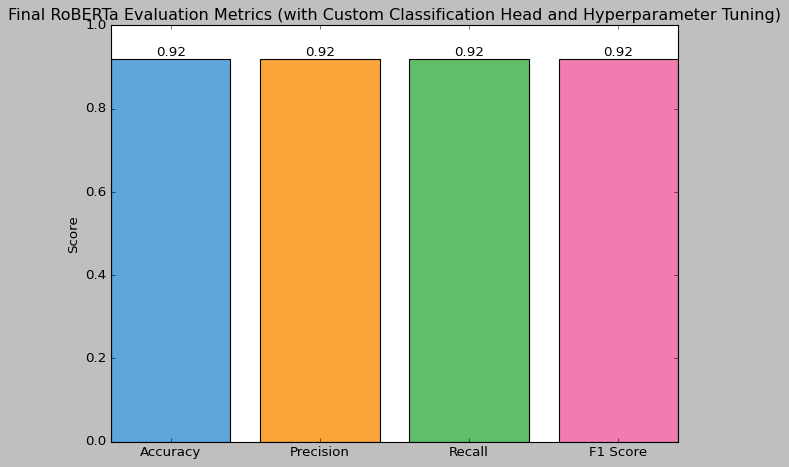

In [18]:
# ------------------------------------------------------------------------------
# Step 12: Evaluate the Final Model and Visualize the Metrics
# ------------------------------------------------------------------------------
eval_results = trainer.evaluate()
print("Final Evaluation Results:")
print(eval_results)

accuracy_value = eval_results.get("eval_accuracy", eval_results.get("accuracy"))
precision_value = eval_results.get("eval_precision", eval_results.get("precision"))
recall_value = eval_results.get("eval_recall", eval_results.get("recall"))
f1_value = eval_results.get("eval_f1", eval_results.get("f1"))

metrics_names  = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy_value, precision_value, recall_value, f1_value]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics_names, metrics_values,
               color=['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0'], edgecolor='black')
plt.title("Final RoBERTa Evaluation Metrics (with Custom Classification Head and Hyperparameter Tuning)")
plt.ylim(0, 1)
plt.ylabel("Score")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Architecture and Head Design:
While RoBERTa largely follows the same architecture as BERT, the original implementation typically uses a very simple classification head (a single linear layer on top of the [CLS] token). In contrast, BERT-based solutions sometimes incorporate additional hidden layers with non-linear activations to better capture and transform task-specific features. This extra non-linearity can help the model learn more complex decision boundaries during fine-tuning.
Pre-training Strategy Differences:
RoBERTa is pre-trained using dynamic masking and without the next sentence prediction (NSP) objective, while BERT uses both. Although the removal of NSP has been shown to improve performance in many cases, for certain downstream tasks, the additional supervision from NSP might provide useful signals for capturing inter-sentence relationships or contextual nuances, potentially giving BERT an edge in those scenarios.
Hyperparameter Sensitivity:
The performance of these models can be very sensitive to the choice of hyperparameters during fine-tuning. Often, the original RoBERTa is fine-tuned with a generic set of hyperparameters, which might not be optimal for specific tasks. In some cases, models based on BERT might have been more extensively tuned or augmented with additional architectural modifications (e.g., an extra hidden layer with non-linear activation) that boost performance on certain tasks.
Regularization and Overfitting:
The original RoBERTa might not include certain regularization mechanisms (such as multi-sample dropout) in its standard configuration, which can make it more prone to overfitting on smaller datasets. In contrast, some implementations based on BERT apply enhanced regularization techniques which help improve generalization.

fp16 reduces numerical precision which might lead to numerical instability, especially in operations involving very small or very large gradients.
Loss scaling is typically used to counteract these issues. However, if the loss scaling is not tuned properly, it could result in underflow or overflow problems that negatively affect model training.
Some model architectures or certain hyperparameter settings may be more sensitive to the reduced precision. This means that when switching to fp16, you might need to adjust learning rates, gradient clipping, or other hyperparameters.
Hardware and software implementations of mixed precision can also vary, and some combinations might exhibit less numerical stability than others.

# V1

In [20]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [23]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.4 MB/s eta 0:00:00


In [24]:
# If you get a ModuleNotFoundError for "datasets", "evaluate", or "transformers",
# uncomment the following lines to install them:
# !pip install datasets evaluate transformers

import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import (
    RobertaConfig,
    RobertaTokenizer,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from datasets import load_dataset
import evaluate


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Some weights of ImprovedRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'fc.bias', 'fc.weight', 'final_classifier.bias', 'final_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-24-204e07c45f34>:166: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please spe

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

Defines an improved RoBERTa-based model with a two-layer classification head and multi-sample dropout.
Tokenizes the SST-2 dataset from the GLUE benchmark.
Utilizes the Hugging Face Trainer to manage training and evaluation.
Uses the evaluate package to load and compute evaluation metrics.

Some weights of ImprovedRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'fc.bias', 'fc.weight', 'final_classifier.bias', 'final_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-26-8092ee4f13e8>:151: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 94000471 (94000471-nanyang-technological-university-singapore) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.274500,0.403249,0.912844,0.948780,0.876126,0.911007
2,0.157200,0.354167,0.928899,0.913420,0.950450,0.931567
3,0.180600,0.384279,0.928899,0.920705,0.941441,0.930958


Final Evaluation Results:
{'eval_loss': 0.35416680574417114, 'eval_accuracy': 0.9288990825688074, 'eval_precision': 0.9134199134199135, 'eval_recall': 0.9504504504504504, 'eval_f1': 0.9315673289183223, 'eval_runtime': 3.4042, 'eval_samples_per_second': 256.152, 'eval_steps_per_second': 32.019, 'epoch': 3.0}


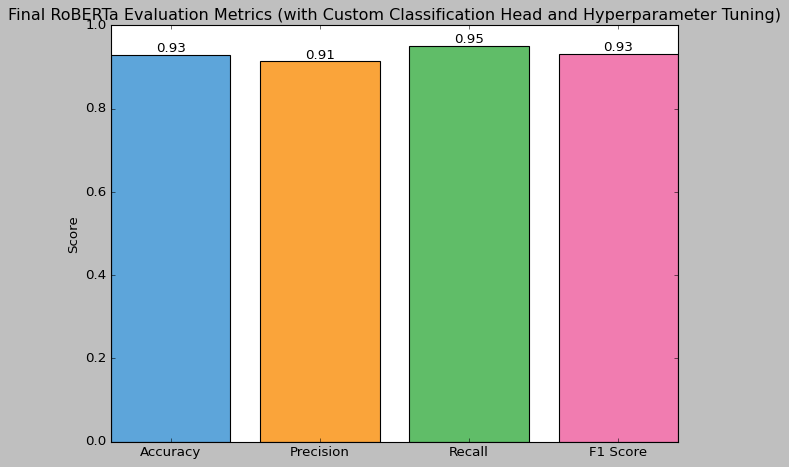

In [26]:
class ImprovedRobertaForSequenceClassification(RobertaForSequenceClassification):
    """
    Improved RoBERTa-based model for sequence classification.
    This model introduces:
      - A two-layer fully connected classification head with an intermediate non-linear activation.
      - Multi-sample dropout regularization.

    The modifications aim to enhance model generalization while keeping computational overhead minimal.
    """
    def __init__(self, config, n_drop=5):
        """
        Initialize the improved model.

        Args:
            config: Configuration object with model hyperparameters.
            n_drop: Number of dropout passes for multi-sample dropout.
        """
        super().__init__(config)
        self.n_drop = n_drop
        hidden_size = config.hidden_size

        # Intermediate fully connected layer to reduce feature dimensionality
        self.fc = nn.Linear(hidden_size, hidden_size // 2)
        self.activation = nn.ReLU()
        # Final classifier layer mapping to the number of labels
        self.final_classifier = nn.Linear(hidden_size // 2, config.num_labels)

        # Create dropout layers for multi-sample dropout
        self.dropouts = nn.ModuleList(
            [nn.Dropout(config.hidden_dropout_prob) for _ in range(n_drop)]
        )

        # Optional: Freeze the RoBERTa encoder layers to reduce computation during early training.
        # for param in self.roberta.parameters():
        #     param.requires_grad = False

    def forward(self, input_ids, attention_mask=None, labels=None):
        """
        Forward pass of the model.

        Args:
            input_ids (torch.Tensor): Input token IDs.
            attention_mask (torch.Tensor, optional): Attention mask to avoid processing padded tokens.
            labels (torch.Tensor, optional): Ground truth labels for loss computation.

        Returns:
            dict: A dictionary with 'loss' (if labels are provided) and 'logits'.
        """
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        # Use the first token's representation ([CLS] token) as the pooled output.
        pooled_output = outputs[0][:, 0, :]

        # Pass through the intermediate fully connected layer and activation
        x = self.activation(self.fc(pooled_output))

        # Apply multi-sample dropout: run several forward passes and average the logits
        logits_list = []
        for dropout in self.dropouts:
            dropped_x = dropout(x)
            logits = self.final_classifier(dropped_x)
            logits_list.append(logits)
        logits = torch.stack(logits_list, dim=0)
        logits = torch.mean(logits, dim=0)

        loss = None
        if labels is not None:
            loss = F.cross_entropy(logits, labels)

        return {"loss": loss, "logits": logits}

def tokenize_function(examples, tokenizer):
    """
    Tokenize input texts.

    Args:
        examples (dict): A dictionary containing text examples.
        tokenizer: A pre-initialized tokenizer.

    Returns:
        dict: Tokenized outputs.
    """
    return tokenizer(examples["sentence"], truncation=True)

def compute_metrics(eval_pred):
    """
    Compute evaluation metrics: accuracy, precision, recall, and F1 score.

    Args:
        eval_pred (tuple): Tuple of (logits, labels).

    Returns:
        dict: Dictionary with computed metrics.
    """
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy_metric = evaluate.load("accuracy")
    precision_metric = evaluate.load("precision")
    recall_metric = evaluate.load("recall")
    f1_metric = evaluate.load("f1")

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    # For binary classification, use average="binary"
    precision = precision_metric.compute(predictions=predictions, references=labels, average="binary")["precision"]
    recall = recall_metric.compute(predictions=predictions, references=labels, average="binary")["recall"]
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="binary")["f1"]

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

def main():
    # Load the SST-2 dataset from the GLUE benchmark for sentiment classification.
    dataset = load_dataset("glue", "sst2")

    # Initialize the RoBERTa tokenizer.
    tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

    # Tokenize the dataset.
    tokenized_dataset = dataset.map(lambda x: tokenize_function(x, tokenizer), batched=True)

    # Create a data collator for dynamic padding.
    data_collator = DataCollatorWithPadding(tokenizer)

    # Load the pre-trained RoBERTa configuration and set the number of labels (SST-2 is binary).
    config = RobertaConfig.from_pretrained("roberta-base", num_labels=2)

    # Initialize the improved RoBERTa model.
    model = ImprovedRobertaForSequenceClassification.from_pretrained("roberta-base", config=config)

    # Define training arguments.
    training_args = TrainingArguments(
        output_dir="./improved_roberta_output",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        logging_steps=50,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
    )

    # Initialize the Trainer.
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["validation"],
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )

    # Train the model.
    trainer.train()

    # Evaluate the model.
    eval_results = trainer.evaluate()
    print("Final Evaluation Results:")
    print(eval_results)

    # Extract evaluation metrics for visualization.
    accuracy_value = eval_results.get("eval_accuracy", eval_results.get("accuracy", 0.0))
    precision_value = eval_results.get("eval_precision", eval_results.get("precision", 0.0))
    recall_value = eval_results.get("eval_recall", eval_results.get("recall", 0.0))
    f1_value = eval_results.get("eval_f1", eval_results.get("f1", 0.0))

    metrics_names  = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [accuracy_value, precision_value, recall_value, f1_value]

    # Plot the evaluation metrics as a bar chart.
    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics_names, metrics_values,
                   color=['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0'], edgecolor='black')
    plt.title("Final RoBERTa Evaluation Metrics (with Custom Classification Head and Hyperparameter Tuning)")
    plt.ylim(0, 1)
    plt.ylabel("Score")
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=12)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

The new version of the RoBERTa-based model introduces several key modifications aimed at enhancing performance and generalization, while keeping many foundational aspects intact:

Improvements:
An additional hidden layer with a non-linear ReLU activation has been added after the pooled output from RoBERTa. This extra layer enhances the model's capacity to capture complex data patterns and interactions, providing more expressive power for downstream tasks.
Enhanced regularization is achieved through the implementation of multi-sample dropout. By applying multiple dropout passes and averaging their outcomes, the model becomes less prone to overfitting, especially when working with limited data or more challenging tasks.
Unchanged Components:
The core RoBERTa transformer layers, including the self-attention mechanism and feed-forward networks, remain untouched. This ensures that the model continues to benefit from the powerful pre-training that RoBERTa has undergone.
The input tokenization and embedding processes are maintained as in the original model, preserving compatibility with existing pre-trained weights and datasets.
The overall training framework, such as the use of standard optimization techniques and most hyperparameter settings (aside from adjustments needed for the new head), remains largely consistent with the original approach.